In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
tsvd = pd.read_parquet("../output/comparison/zinc_res_tsvd.parquet")[["k_2", "k_4", "k_8"]]
lpca = pd.read_parquet("../output/comparison/zinc_res_lpca.parquet")

In [47]:
def plot_nodes_error_k(data, k_list, title):
    plt.figure(figsize=(15, 9))
    for k in k_list:
        col_name = "k_" + str(k) 
        plt.errorbar(data.index, data[col_name]["mean"], yerr=data[col_name]["std"], fmt='-o', capsize=0.2, capthick=1, label=col_name)
        if len(data.index) > 20:
            plt.xticks(range(data.index.min(), data.index.max(), len(data.index) // 5), rotation=60)
        else:
            plt.xticks(data.index, rotation=60)
    plt.xlabel("Number of Nodes")
    plt.ylabel("Relative Reconstruction Error")
    plt.title(title)
    plt.legend()

In [51]:
zinc_k_2 = pd.read_parquet("../lpca_output/lpca2_4_4.parquet")
zinc_k_4 = pd.read_parquet("../lpca_output/lpca4b_4_4.parquet")
zinc_k_8 = pd.read_parquet("../lpca_output/lpca8b_4_4.parquet")

In [57]:
zinc_k_2.groupby("n_nodes")["error"].mean().index

Index([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36],
      dtype='int64', name='n_nodes')

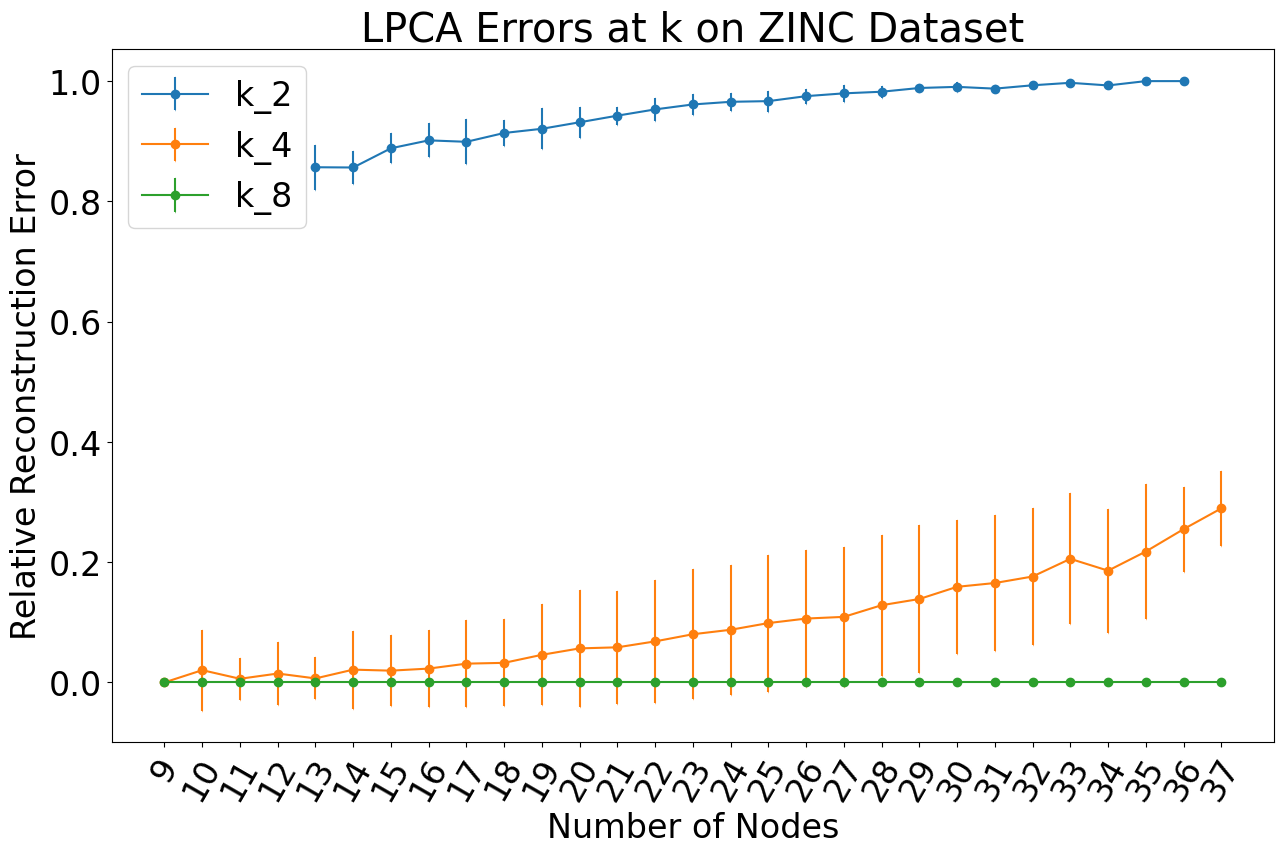

In [60]:
plt.figure(figsize=(15, 9)) 
plt.errorbar(zinc_k_2.groupby("n_nodes")["error"].mean().index, zinc_k_2.groupby("n_nodes")["error"].mean(), yerr=zinc_k_2.groupby("n_nodes")["error"].std(), fmt='-o', capsize=0.2, capthick=1, label="k_2")
plt.xticks(zinc_k_2.groupby("n_nodes")["error"].mean().index, rotation=60)
plt.errorbar(zinc_k_4.groupby("n_nodes")["error"].mean().index, zinc_k_4.groupby("n_nodes")["error"].mean(), yerr=zinc_k_4.groupby("n_nodes")["error"].std(), fmt='-o', capsize=0.2, capthick=1, label="k_4")
plt.xticks(zinc_k_4.groupby("n_nodes")["error"].mean().index, rotation=60)
plt.errorbar(zinc_k_8.groupby("n_nodes")["error"].mean().index, zinc_k_8.groupby("n_nodes")["error"].mean(), yerr=zinc_k_8.groupby("n_nodes")["error"].std(), fmt='-o', capsize=0.2, capthick=1, label="k_8")
plt.xticks(zinc_k_8.groupby("n_nodes")["error"].mean().index, rotation=60)
plt.xlabel("Number of Nodes")
plt.ylabel("Relative Reconstruction Error")
plt.title("LPCA Errors at k on ZINC Dataset")
plt.legend()

In [25]:
plt.rcParams.update({'font.size': 24})

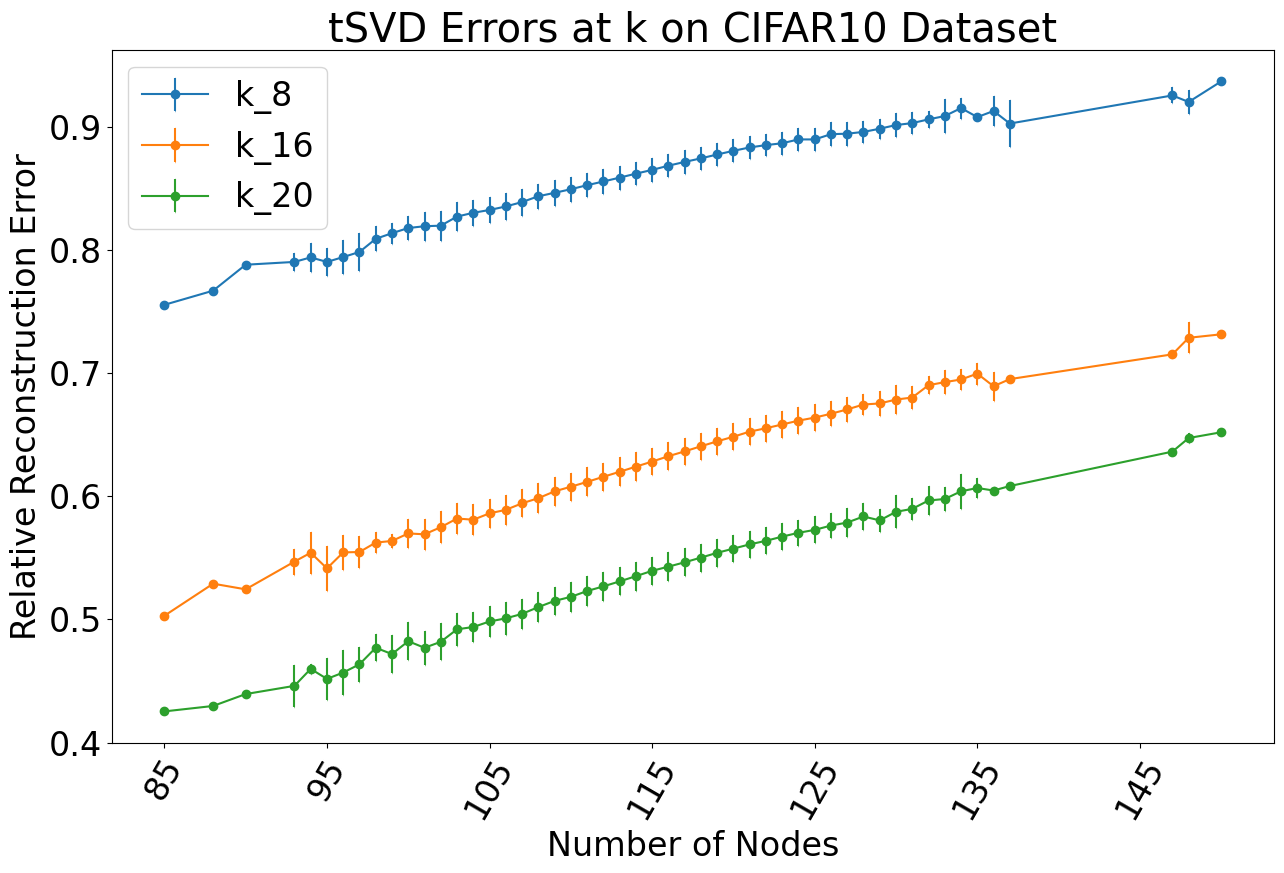

In [48]:
plot_nodes_error_k(tsvd, [8, 16, 20], "tSVD Errors at k on CIFAR10 Dataset")

In [40]:
cifar_8 = pd.read_parquet("results/CIFAR10_LPCA_k_8_save.parquet")

In [42]:
cifar_8["error"].mean()

np.float64(2.2020111315986552e-05)

In [41]:
tsvd = pd.read_parquet("../output/comparison/cifar_res_tsvd.parquet")[["k_8", "k_16", "k_20"]]